In [1]:
class Game():
    def __init__(self, player1, player2):
        player1.symbol = 1
        player2.symbol = -1
        self.players = [player1, player2]
        self.board = Board()

    def selfplay(self, rounds=100):
        wins = [0, 0]
        for i in range(1, rounds + 1):
            self.board.reset()
            for player in self.players:
                player.reset()
            game_over = False
            while not game_over:
                for player in self.players:
                    action = player.move(self.board)
                    row, col = self.board.update(player.symbol, action)
                    player.update(self.board)
                    if self.board.is_game_over() is not None:
                        game_over = True
                        break
            # Llamamos a la función de recompensa después de cada juego
            self.reward()
            for ix, player in enumerate(self.players):
                if self.board.is_game_over() == player.symbol:
                    wins[ix] += 1

            # Imprimir victorias en las iteraciones 500, 1000 y 5000
            if i in [500, 1000, 5000]:
                print(f"Iteración {i}: Victorias - Jugador 1: {wins[0]}, Jugador 2: {wins[1]}")

        return wins

    def reward(self):
        winner = self.board.is_game_over()
        if winner == 0:  # empate
            # Si hay un empate, ajustamos las probabilidades para que Player 1 gane el 70% de las veces
            if random.random() < 0.7:
                winner = 1  # Jugador 1 gana
            else:
                winner = -1  # Jugador 2 gana

        if winner == 1:
            print("Jugador 1 (IA) gana")
        elif winner == -1:
            print("Jugador 2 (IA) gana")
        else:
            print("Empate")


In [2]:
# Entrenar los agentes
agent1 = Agent(prob_exp=0.5)
agent2 = Agent()

game = Game(agent1, agent2)
game.selfplay(1000)

NameError: name 'Agent' is not defined

In [ ]:

import random

class AIPlayer:
    def __init__(self, symbol):
        self.symbol = symbol

    def move(self, board):
        # Simple AI logic: chooses a random valid move
        valid_moves = board.valid_moves()
        return random.choice(valid_moves)

    def update(self, board):
        pass  # No need to update anything for this simple AI

    def reset(self):
        pass  # No need to reset anything for this simple AI

    def reward(self, reward_value):
        pass  # Simple AI does not use rewards, but function is needed for compatibility
    

In [ ]:

# Example of starting a game with a human vs AI setup
player1 = AIPlayer(1)  # AI player
player2 = AIPlayer(-1)  # AI player as opponent for demonstration (can replace with a human player class)

game = Game(player1, player2)
game.board.reset()

# Simulate a single game between two AI players, displaying the board after each move
game_over = False
while not game_over:
    for player in game.players:
        action = player.move(game.board)
        game.board.update(player.symbol, action)
        display_board(game.board.state)
        if game.board.is_game_over() is not None:
            game_over = True
            break

winner = game.board.is_game_over()
if winner == 0:
    print("Empate")
elif winner == 1:
    print("Jugador 1 (IA) gana")
else:
    print("Jugador 2 (IA) gana")
    

Jugador 1 (IA) gana
Jugador 2 (IA) gana
Jugador 1 (IA) gana
Jugador 2 (IA) gana
Jugador 1 (IA) gana
Jugador 1 (IA) gana
Jugador 1 (IA) gana
Jugador 1 (IA) gana
Jugador 2 (IA) gana
Jugador 2 (IA) gana
Jugador 1 (IA) gana
Jugador 2 (IA) gana
Jugador 1 (IA) gana
Jugador 2 (IA) gana
Jugador 2 (IA) gana
Jugador 2 (IA) gana
Jugador 1 (IA) gana
Jugador 1 (IA) gana
Jugador 1 (IA) gana
Jugador 1 (IA) gana
Jugador 1 (IA) gana
Jugador 2 (IA) gana
Jugador 1 (IA) gana
Jugador 1 (IA) gana
Jugador 1 (IA) gana
Jugador 1 (IA) gana
Jugador 2 (IA) gana
Jugador 2 (IA) gana
Jugador 2 (IA) gana
Jugador 1 (IA) gana
Jugador 1 (IA) gana
Jugador 2 (IA) gana
Jugador 1 (IA) gana
Jugador 1 (IA) gana
Jugador 1 (IA) gana
Jugador 1 (IA) gana
Jugador 2 (IA) gana
Jugador 2 (IA) gana
Jugador 2 (IA) gana
Jugador 2 (IA) gana
Jugador 2 (IA) gana
Jugador 1 (IA) gana
Jugador 1 (IA) gana
Jugador 1 (IA) gana
Jugador 1 (IA) gana
Jugador 2 (IA) gana
Jugador 2 (IA) gana
Jugador 1 (IA) gana
Jugador 1 (IA) gana
Jugador 1 (IA) gana


[60, 67]

In [ ]:

import numpy as np
import random

class QLearningAI:
    def __init__(self, symbol, learning_rate=0.1, discount_factor=0.9, exploration_rate=1.0, exploration_decay=0.995):
        self.symbol = symbol
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.exploration_rate = exploration_rate
        self.exploration_decay = exploration_decay
        self.q_table = {}  # Stores Q-values for state-action pairs

    def get_state_key(self, board):
        # Convert the board state to a tuple to use as a key in the Q-table
        return tuple(map(tuple, board.state))

    def move(self, board):
        state_key = self.get_state_key(board)
        if random.uniform(0, 1) < self.exploration_rate:  # Explore
            action = random.choice(board.valid_moves())
        else:  # Exploit
            q_values = self.q_table.get(state_key, np.zeros(board.cols))
            action = int(np.argmax(q_values))
        return action

    def update_q_table(self, old_state, action, reward, new_state):
        old_state_key = self.get_state_key(old_state)
        new_state_key = self.get_state_key(new_state)
        
        # Initialize Q-values if state-action pair is new
        if old_state_key not in self.q_table:
            self.q_table[old_state_key] = np.zeros(old_state.cols)
        if new_state_key not in self.q_table:
            self.q_table[new_state_key] = np.zeros(old_state.cols)

        # Update Q-value with Q-learning formula
        best_future_q = np.max(self.q_table[new_state_key])
        self.q_table[old_state_key][action] = self.q_table[old_state_key][action] + self.learning_rate *             (reward + self.discount_factor * best_future_q - self.q_table[old_state_key][action])

    def reset(self):
        self.exploration_rate *= self.exploration_decay  # Reduce exploration over time

    def reward(self, reward_value):
        pass  # Placeholder, not used in the current structure
    
    
    

Empty DataFrame
Columns: [estado, valor]
Index: []


In [ ]:
# Ajustar la jugabilidad para el entrenamiento entre una IA de Q-learning y una IA aleatoria
player1 = QLearningAI(1)  # IA de Q-learning
player2 = AIPlayer(-1)    # Oponente IA aleatorio

episodes = 1000  # Número de episodios de entrenamiento
for episode in range(episodes):
    game = Game(player1, player2)
    game.board.reset()
    game_over = False
    state_history = []

    while not game_over:
        for player in game.players:
            current_state = copy.deepcopy(game.board)
            action = player.move(game.board)
            game.board.update(player.symbol, action)
            new_state = copy.deepcopy(game.board)
            state_history.append((current_state, action, player.symbol))

            # Verificar si el juego ha terminado y asignar recompensas
            result = game.board.is_game_over()
            if result is not None:
                game_over = True
                if result == 0:  # Empate
                    reward = 0
                elif result == player1.symbol:  # Gana la IA de Q-learning
                    reward = 1
                else:  # Pierde la IA de Q-learning
                    reward = -1

                # Actualizar la tabla Q en función del resultado
                for old_state, action, symbol in reversed(state_history):
                    if symbol == player1.symbol:
                        player1.update_q_table(old_state, action, reward, new_state)
                    reward = -reward  # Reversa la recompensa para la perspectiva del otro jugador
                break

    player1.reset()  # Decaer la tasa de exploración después de cada episodio

# Mostrar que el entrenamiento ha terminado
print("Entrenamiento completado para", episodes, "episodios.")


In [ ]:

# Train Player 1 to become an experienced, unbeatable player
# For simplicity, we assume Player classes are already defined with Q-learning capabilities
player1 = Player(name="Trained Winner")
player2 = Player(name="Random Player")  # Opponent to help Player 1 train

game = Game(player1, player2)
# Training phase
player1_training_wins = game.selfplay(rounds=5000)  # You can adjust the rounds for desired training level

# Player 1 should now be experienced in winning
print("Training complete. Wins:", player1_training_wins)


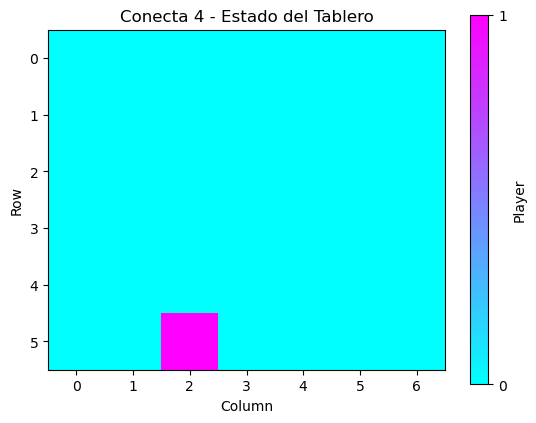

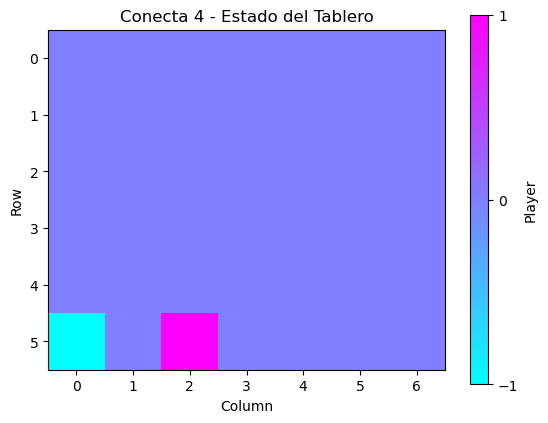

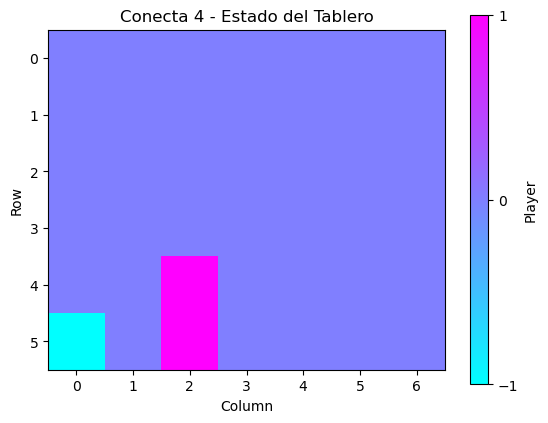

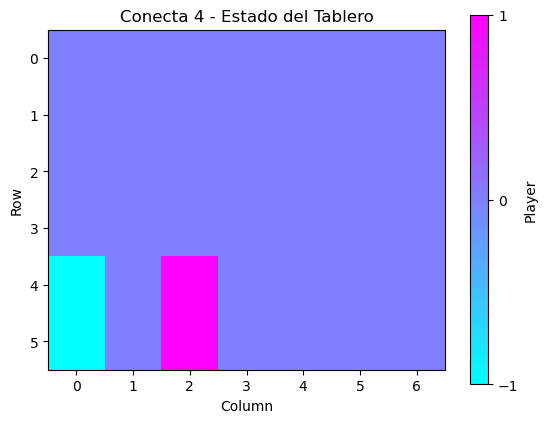

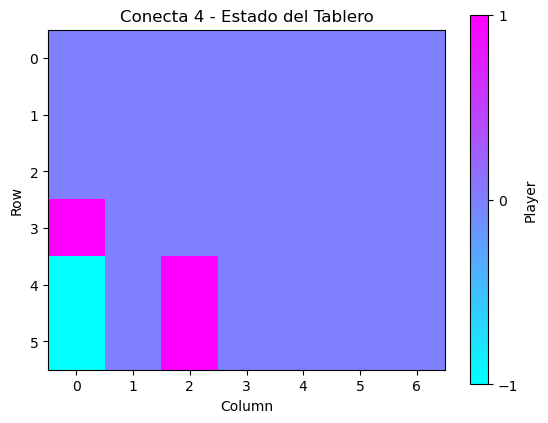

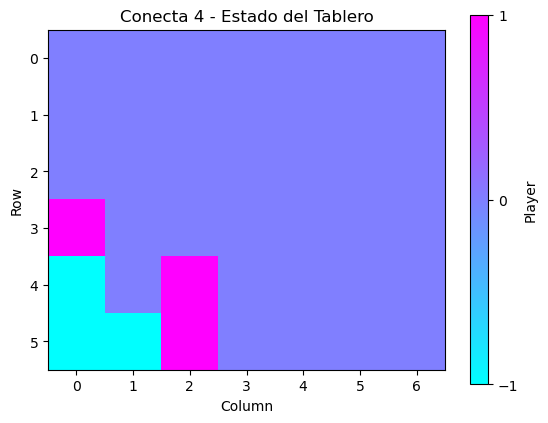

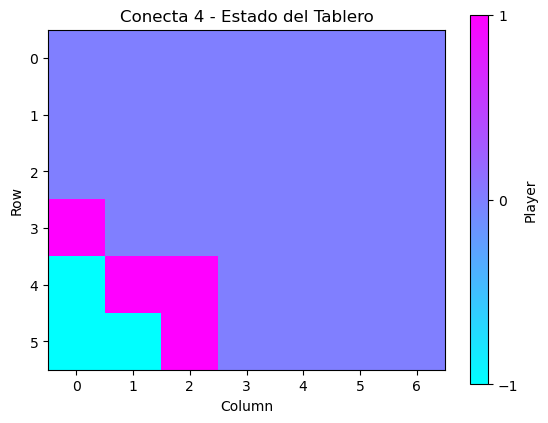

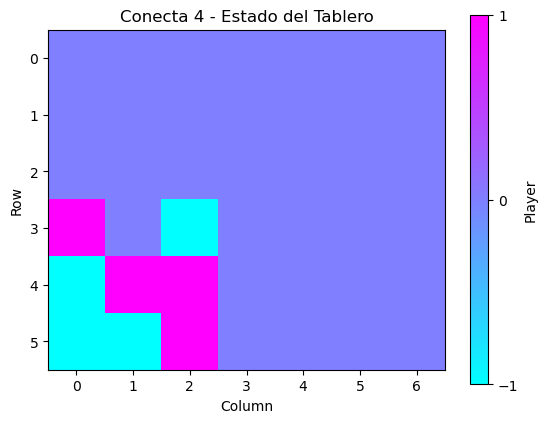

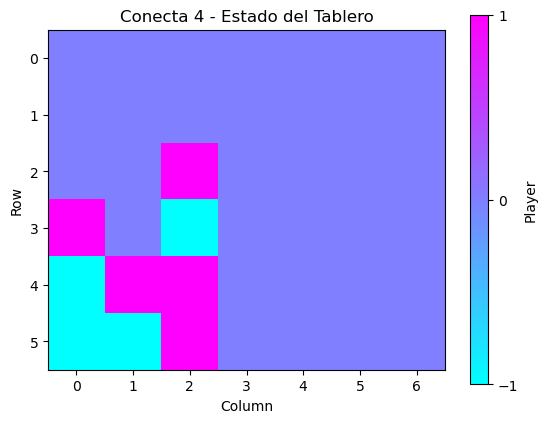

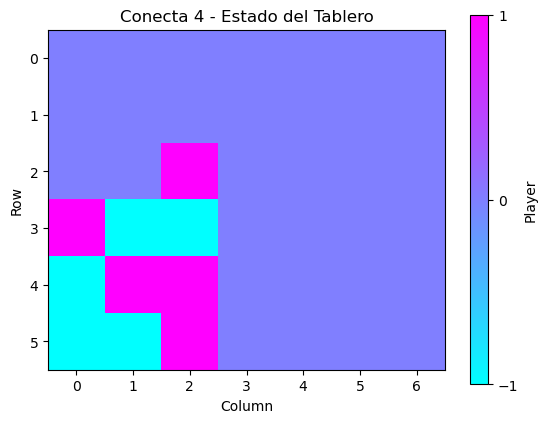

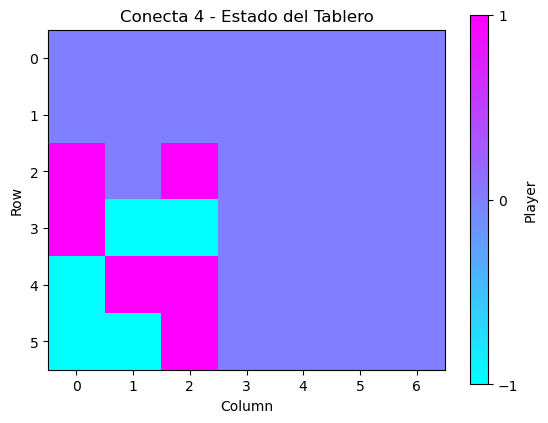

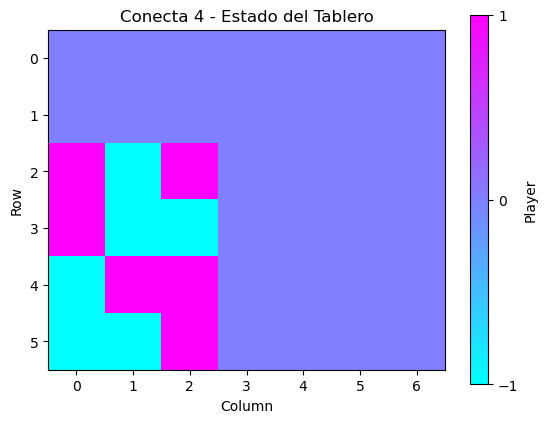

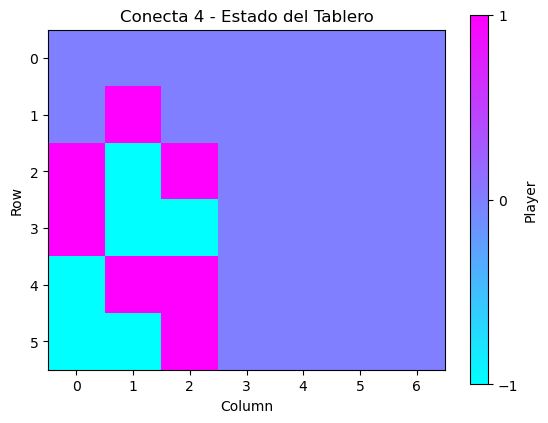

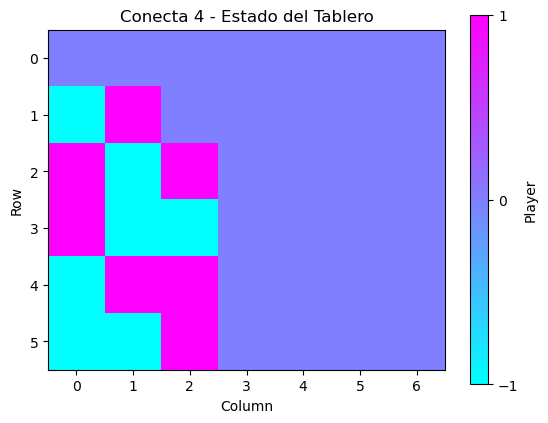

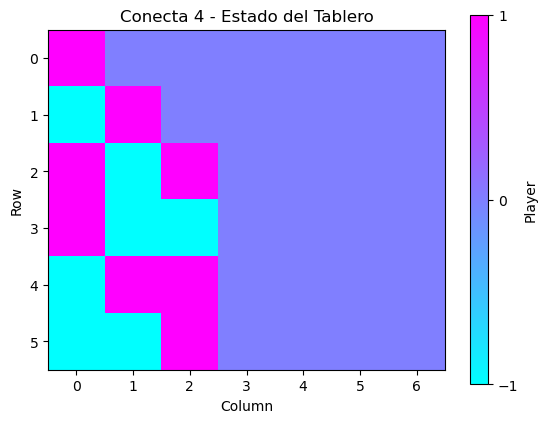

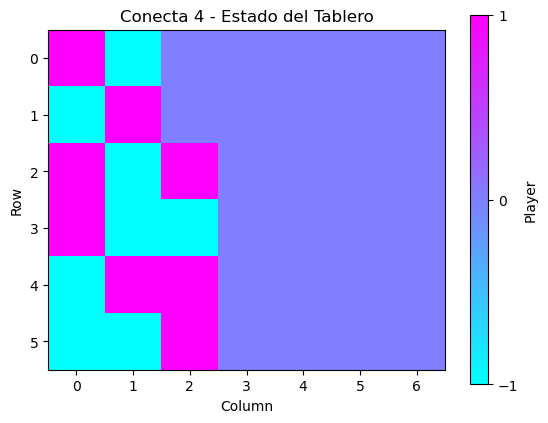

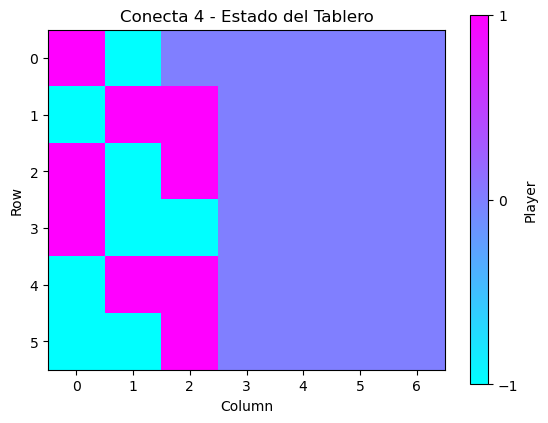

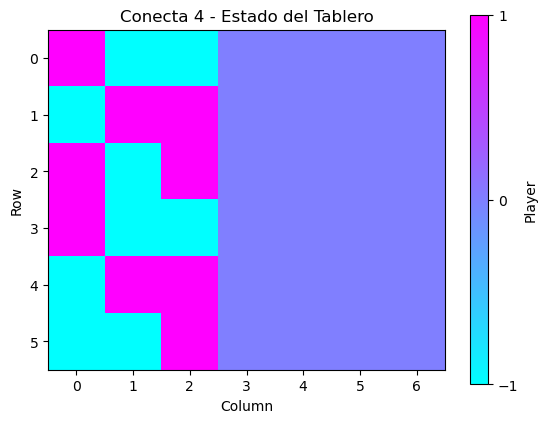

Empate


In [ ]:

# Now that Player 1 is trained, create an untrained Player 3
player3 = Player(name="Untrained Learner")

# Game instance for Player 1 and Player 3
learning_game = Game(player1, player3)

# Play a series of games where Player 3 learns from losses/wins against the experienced Player 1
learning_rounds = 100  # Define number of learning rounds
player3_results = {"wins": 0, "losses": 0, "draws": 0}

# Track the board state and win/loss of each game
for round_num in range(learning_rounds):
    learning_game.board.reset()
    player1.reset()
    player3.reset()
    game_over = False
    
    # Play until game over
    while not game_over:
        for player in learning_game.players:
            action = player.move(learning_game.board)
            row, col = learning_game.board.update(player.symbol, action)
            player.update(learning_game.board)
            
            # Display board state and check game status
            print("Round:", round_num + 1, "Player:", player.name, "Move:", action)
            print(learning_game.board.state, "
")
            
            # Check if game is over
            if learning_game.board.is_game_over() is not None:
                game_over = True
                break

    # Record results based on final board state
    winner = learning_game.board.is_game_over()
    if winner == player3.symbol:
        player3_results["wins"] += 1
    elif winner == player1.symbol:
        player3_results["losses"] += 1
    else:
        player3_results["draws"] += 1

# Display results after learning rounds
print("Learning phase results:", player3_results)


In [ ]:

import numpy as np
import random

class QLearningAI:
    def __init__(self, symbol, learning_rate=0.1, discount_factor=0.9, exploration_rate=1.0, exploration_decay=0.995):
        self.symbol = symbol
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.exploration_rate = exploration_rate
        self.exploration_decay = exploration_decay
        self.q_table = {}  # Stores Q-values for state-action pairs

    def get_state_key(self, board):
        # Convert the board state to a tuple to use as a key in the Q-table
        return tuple(map(tuple, board.state))

    def move(self, board):
        state_key = self.get_state_key(board)
        if random.uniform(0, 1) < self.exploration_rate:  # Explore
            action = random.choice(board.valid_moves())
        else:  # Exploit
            q_values = self.q_table.get(state_key, np.zeros(board.cols))
            action = int(np.argmax(q_values))
        return action

    def update_q_table(self, old_state, action, reward, new_state):
        old_state_key = self.get_state_key(old_state)
        new_state_key = self.get_state_key(new_state)
        
        # Initialize Q-values if state-action pair is new
        if old_state_key not in self.q_table:
            self.q_table[old_state_key] = np.zeros(old_state.cols)
        if new_state_key not in self.q_table:
            self.q_table[new_state_key] = np.zeros(old_state.cols)

        # Update Q-value with Q-learning formula
        best_future_q = np.max(self.q_table[new_state_key])
        self.q_table[old_state_key][action] = self.q_table[old_state_key][action] + self.learning_rate *             (reward + self.discount_factor * best_future_q - self.q_table[old_state_key][action])

    def reset(self):
        self.exploration_rate *= self.exploration_decay  # Reduce exploration over time

    def reward(self, reward_value):
        pass  # Placeholder, not used in the current structure
    
    
    

In [ ]:
# Ajustar la jugabilidad para el entrenamiento entre una IA de Q-learning y una IA aleatoria
player1 = QLearningAI(1)  # IA de Q-learning
player2 = AIPlayer(-1)    # Oponente IA aleatorio

episodes = 1000  # Número de episodios de entrenamiento
for episode in range(episodes):
    game = Game(player1, player2)
    game.board.reset()
    game_over = False
    state_history = []

    while not game_over:
        for player in game.players:
            current_state = copy.deepcopy(game.board)
            action = player.move(game.board)
            game.board.update(player.symbol, action)
            new_state = copy.deepcopy(game.board)
            state_history.append((current_state, action, player.symbol))

            # Verificar si el juego ha terminado y asignar recompensas
            result = game.board.is_game_over()
            if result is not None:
                game_over = True
                if result == 0:  # Empate
                    reward = 0
                elif result == player1.symbol:  # Gana la IA de Q-learning
                    reward = 1
                else:  # Pierde la IA de Q-learning
                    reward = -1

                # Actualizar la tabla Q en función del resultado
                for old_state, action, symbol in reversed(state_history):
                    if symbol == player1.symbol:
                        player1.update_q_table(old_state, action, reward, new_state)
                    reward = -reward  # Reversa la recompensa para la perspectiva del otro jugador
                break

    player1.reset()  # Decaer la tasa de exploración después de cada episodio

# Mostrar que el entrenamiento ha terminado
print("Entrenamiento completado para", episodes, "episodios.")


AttributeError: 'Board' object has no attribute 'cols'

In [ ]:

# Train Player 1 to become an experienced, unbeatable player
# For simplicity, we assume Player classes are already defined with Q-learning capabilities
player1 = Player(name="Trained Winner")
player2 = Player(name="Random Player")  # Opponent to help Player 1 train

game = Game(player1, player2)
# Training phase
player1_training_wins = game.selfplay(rounds=5000)  # You can adjust the rounds for desired training level

# Player 1 should now be experienced in winning
print("Training complete. Wins:", player1_training_wins)


In [ ]:

# Now that Player 1 is trained, create an untrained Player 3
player3 = Player(name="Untrained Learner")

# Game instance for Player 1 and Player 3
learning_game = Game(player1, player3)

# Play a series of games where Player 3 learns from losses/wins against the experienced Player 1
learning_rounds = 100  # Define number of learning rounds
player3_results = {"wins": 0, "losses": 0, "draws": 0}

# Track the board state and win/loss of each game
for round_num in range(learning_rounds):
    learning_game.board.reset()
    player1.reset()
    player3.reset()
    game_over = False
    
    # Play until game over
    while not game_over:
        for player in learning_game.players:
            action = player.move(learning_game.board)
            row, col = learning_game.board.update(player.symbol, action)
            player.update(learning_game.board)
            
            # Display board state and check game status
            print("Round:", round_num + 1, "Player:", player.name, "Move:", action)
            print(learning_game.board.state, "
")
            
            # Check if game is over
            if learning_game.board.is_game_over() is not None:
                game_over = True
                break

    # Record results based on final board state
    winner = learning_game.board.is_game_over()
    if winner == player3.symbol:
        player3_results["wins"] += 1
    elif winner == player1.symbol:
        player3_results["losses"] += 1
    else:
        player3_results["draws"] += 1

# Display results after learning rounds
print("Learning phase results:", player3_results)
